# Joanna Brown

## Research question/interests :

This semester we are analyzing a dataset provided by Inside Airbnb. 

As many of you know when you are browsing Airbnb listings, some of the hosts are designated as "superhosts", whereas others are just "regular" hosts...I am curious to know what sets them apart. 

Airbnb lists some of the factors that contribute to a host becoming a superhost :
- Host a minimum of 10 stays in a year
- Respond to guests quickly and maintain a 90% response rate or higher
- Have at least 80% 5-star reviews
- Honor confirmed reservations (meaning hosts should rarely cancel)

In this analysis I will look at the response rate, number of reviews, and review ratings of superhosts v regualar hosts as well as how the two categories of hosts vary over a number of attributes. 

### Task 1. EDA :

In [1]:
import pandas as pd


In [2]:
#TO DO
#Clean up outliers?
#Rename columns?
#Link Analysis and project functions
#Attribute code properly 

In [3]:
df = pd.read_csv ("../data/raw/listings.csv")

In [4]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


In [5]:
#df.fillna({'reviews_per_month':0}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15084 non-null  int64  
 1   listing_url                                   15084 non-null  object 
 2   scrape_id                                     15084 non-null  int64  
 3   last_scraped                                  15084 non-null  object 
 4   name                                          15083 non-null  object 
 5   description                                   14598 non-null  object 
 6   neighborhood_overview                         9326 non-null   object 
 7   picture_url                                   15084 non-null  object 
 8   host_id                                       15084 non-null  int64  
 9   host_url                                      15084 non-null 

In [7]:
display(df.shape[0])

15084

In [8]:
display(df.shape[1])

74

In [9]:
df.describe(include='float64')

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,15077.000000,15077.000000,0.0,15084.000000,15084.000000,0.0,13945.000000,14873.000000,15084.000000,1.508400e+04,0.0,11609.000000,11435.000000,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,11609.000000
mean,5.689593,5.689593,NaN,43.681463,-79.397382,NaN,1.444532,1.645263,27.492761,4.942609e+05,NaN,4.650082,4.780028,4.679526,4.835753,4.837102,4.825204,4.694973,1.340099
std,18.884768,18.884768,NaN,0.048682,0.065256,NaN,0.824944,1.107654,39.570448,3.135789e+07,NaN,0.725082,0.430746,0.510812,0.383327,0.406078,0.336104,0.460011,3.584430
min,0.000000,0.000000,NaN,43.586740,-79.622620,NaN,1.000000,0.000000,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,NaN,43.645490,-79.425860,NaN,1.000000,1.000000,28.000000,3.650000e+02,NaN,4.630000,4.750000,4.590000,4.830000,4.840000,4.780000,4.630000,0.160000
50%,1.000000,1.000000,NaN,43.663165,-79.397250,NaN,1.000000,1.000000,28.000000,1.125000e+03,NaN,4.840000,4.910000,4.840000,4.960000,4.970000,4.930000,4.810000,0.510000
75%,4.000000,4.000000,NaN,43.702235,-79.376487,NaN,2.000000,2.000000,28.000000,1.125000e+03,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.430000
max,272.000000,272.000000,NaN,43.833170,-79.119670,NaN,9.000000,13.000000,1125.000000,2.147484e+09,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,144.000000


In [10]:
df.describe(include='object').T

,count,unique,top,freq
listing_url,15084,15084,https://www.airbnb.com/rooms/1419,1
last_scraped,15084,2,2021-08-06,9702
name,15083,14742,Private room in a shared hostel suite downtown,8
description,14598,14018,Whether you are just getting away for the week...,12
neighborhood_overview,9326,7850,The lively Entertainment District lives up to ...,60
picture_url,15084,14646,https://a0.muscache.com/pictures/5b42a820-a046...,12
host_url,15084,9864,https://www.airbnb.com/users/show/10202618,71
host_name,15077,4740,David,105
host_since,15077,3272,2013-11-23,73
host_location,15070,336,"Toronto, Ontario, Canada",11048


### Task 2. Set up Analysis Pipeline :

Step 1 - One of the first things we notice is that price is an object and not a float - so we need to make a funciton to be able to use price as numeric data. 

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
%matplotlib inline

In [12]:
import project_functions2 as p2
data = "../data/raw/listings.csv"
df = p2.unprocessed(data)
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


In [13]:
df = df.rename(columns={"review_scores_communication":"Reviews - Communication",
                  "reviews_per_month": "Reviews per Month",
                   "host_response_rate": "Host Response Rate",    
                  "host_is_superhost": "Host is Superhost"},)

In [14]:
# Remove characters from price column and convert to float.

df['price'] = df['price'].apply(lambda x : p2.replace_characters(x, ['$', ','], '')).astype(float)

# Remove the '%' sign from the host_response_rate feature, and convert to float

df['Host Response Rate'] = df['Host Response Rate'].apply(lambda x : p2.replace_characters(x, '%', '')).astype(float)

In [15]:
# quick look at a statistic summary of the numeric variables

df[['price', 'minimum_nights', 'number_of_reviews', 'Reviews per Month',
    'calculated_host_listings_count', 'availability_365','Host Response Rate']].describe().round(1)

,price,minimum_nights,number_of_reviews,Reviews per Month,calculated_host_listings_count,availability_365,Host Response Rate
count,15084.0,15084.0,15084.0,11609.0,15084.0,15084.0,8724.0
mean,156.4,27.4,25.8,1.3,4.3,128.3,87.5
std,365.6,39.6,52.5,3.6,8.4,134.5,28.0
min,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,65.0,28.0,1.0,0.2,1.0,0.0,93.0
50%,100.0,28.0,5.0,0.5,1.0,83.0,100.0
75%,168.0,28.0,26.0,1.4,4.0,243.0,100.0
max,13000.0,1125.0,828.0,144.0,71.0,365.0,100.0


Step 2 - What columns have empty values / missing data?

In [16]:
all_data = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending = False)

In [17]:
missing_data = pd.DataFrame({'Missing Data (%)' : round(all_data, 2)}) 

In [18]:
display(missing_data)

,Missing Data (%)
neighbourhood_group_cleansed,100.00
calendar_updated,100.00
bathrooms,100.00
license,71.03
host_about,45.24
...,...
minimum_maximum_nights,0.00
maximum_maximum_nights,0.00
minimum_nights_avg_ntm,0.00
maximum_nights_avg_ntm,0.00


We can see that "neighbourhood_group_cleansed", "calendar_updated", "bathrooms", and "license" are missing the majority of their data, so they can be removed from the dataset. 

In [19]:
df.drop(['neighbourhood_group_cleansed', 'license', 'calendar_updated', 'bathrooms'], axis=1, inplace=True)


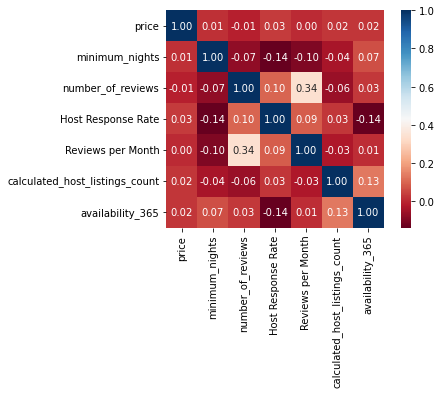

In [20]:
# correlation matrix 
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'Host Response Rate', 'Reviews per Month',
'calculated_host_listings_count', 'availability_365']].corr()

# plot the heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

# Task 4:
### Analysis of Reaserch Questions. 

Since I will be comparing superhosts and regualr hosts, split the listings depending on whether or not the host is a superhost (based on t/f).

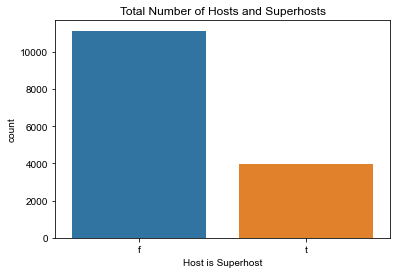

In [21]:
sns.countplot(x='Host is Superhost',palette=["C0", "C1"], data=df).set(title="Total Number of Hosts and Superhosts")

sns.set(rc={'figure.figsize':(10,5)})

As we can see, regular hosts far outnumber superhosts in Toronto with there being almost 3x as many regular hosts as superhosts. 

Next we want to compare how the ratings of superhosts compare against regular hosts in the categories listed by Airbnb:
- review_scores_rating                          
- review_scores_accuracy                                             
- review_scores_checkin                        
- review_scores_communication                   
- review_scores_location                      
- review_scores_value 

We can begin by comparing the means for all the review scores across superhosts and regular hosts. 
As noted by Airbnb, superhosts must have at least 80% 5-star reviews.

<AxesSubplot:title={'center':'Host Response Rate in Percentage'}, xlabel='Host is Superhost', ylabel='Host Response Rate'>

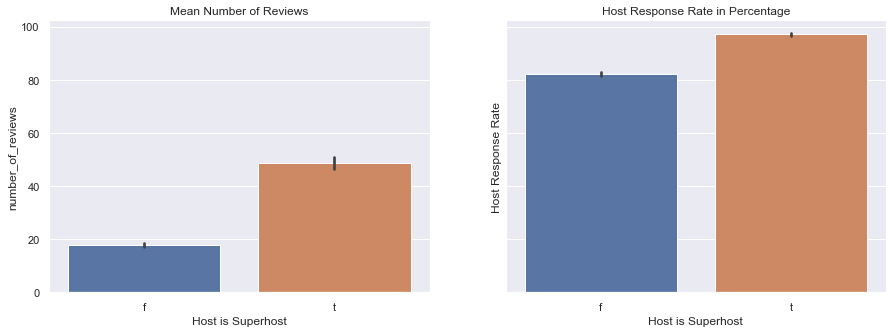

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.barplot(ax=axes[0], x='Host is Superhost',y='number_of_reviews', data=df, estimator=np.mean).set(title="Mean Number of Reviews")
#plt.ylim(0.0, 100)
axes[0]
#plt.show
#sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(ax=axes[1], x='Host is Superhost',y='Host Response Rate', data=df, estimator=np.mean).set(title="Host Response Rate in Percentage")
#plt.ylim(0.0, 200)
axes[1]

<AxesSubplot:title={'center':'Review Scores Checkin'}, xlabel='Host is Superhost', ylabel='review_scores_checkin'>

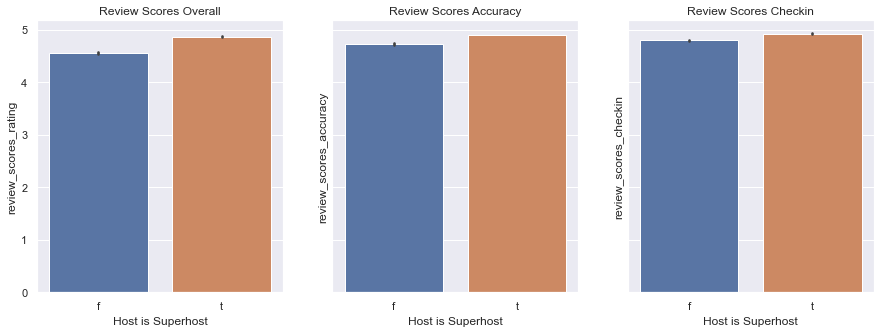

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(ax=axes[0], x='Host is Superhost',y='review_scores_rating', data=df, estimator=np.mean).set(title="Review Scores Overall")
axes[0]

sns.barplot(ax=axes[1], x='Host is Superhost',y='review_scores_accuracy', data=df, estimator=np.mean).set(title="Review Scores Accuracy")
axes[1]

sns.barplot(ax=axes[2], x='Host is Superhost',y='review_scores_checkin', data=df, estimator=np.mean).set(title="Review Scores Checkin")
axes[2]



<AxesSubplot:title={'center':'Value'}, xlabel='Host is Superhost', ylabel='review_scores_value'>

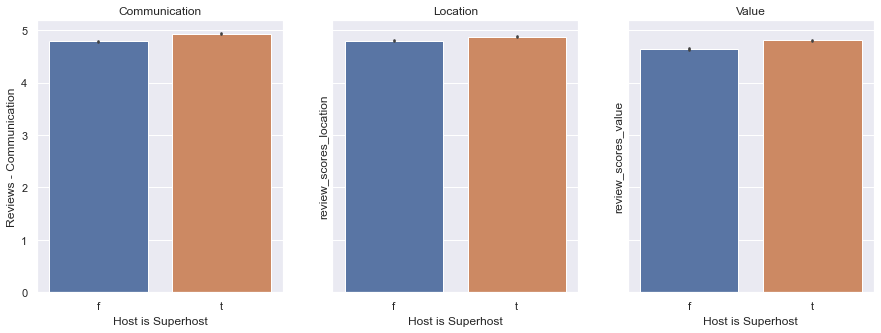

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(ax=axes[0], x='Host is Superhost',y='Reviews - Communication', data=df, estimator=np.mean).set(title="Communication")
axes[0]

sns.barplot(ax=axes[1], x='Host is Superhost',y='review_scores_location', data=df, estimator=np.mean).set(title="Location")
axes[1]

sns.barplot(ax=axes[2], x='Host is Superhost',y='review_scores_value', data=df, estimator=np.mean).set(title="Value")
axes[2]


[Text(0.5, 1.0, 'Review Scores on 5 Point Scale')]

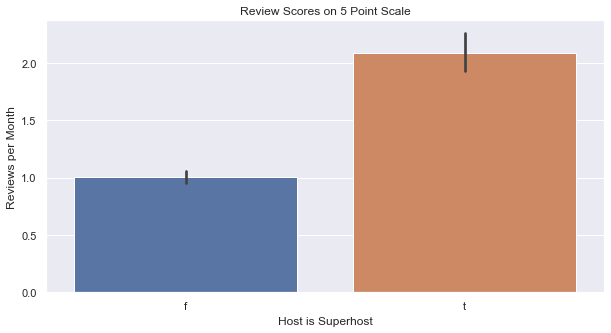

In [25]:
sns.barplot(x='Host is Superhost',y='Reviews per Month', data=df, estimator=np.mean).set(title="Review Scores on 5 Point Scale")
#plt.ylim(0.0, 5)


In [26]:
# Import necessarily libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
#df = sns.load_dataset("df")

# Set up a factorplot
g = sns.catplot(x=["Reviews - Communication", "review_scores_location", "review_scores_value"], hue= "Host is Superhost", hue_order=['t', 'f'], data=df, kind="bar", palette="muted", legend=False)
                   
# Show plot
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
superhosts, regularhosts = p2.split_host()

In [ ]:
# get numeric subset of superhost, regular host
superhosts_num = p2.numeric_set(superhosts)
regularhosts_num = p2.numeric_set(regularhosts)

In [ ]:
numeric_mean_by_hosts = p2.get_num_mean_hosts(superhosts_num, regularhosts_num)

numeric_mean_by_hosts

In [ ]:
p2.plot_numeric_mean_by_host(numeric_mean_by_hosts)

In [ ]:
p2.plot_hist_host_since(p2.get_host_since_year(regularhosts), "Regularhost Since")

In [ ]:
p2.plot_hist_host_since(p2.get_host_since_year(superhosts), "Superhost Since")

In [ ]:
#New df for data on responses, including superhost status
response = df[['Host is Superhost','host_response_time','Host Response Rate']]

In [ ]:
#Get rid of all null data.
response = response.dropna()
response

In [ ]:
#Change the values in the host_is_superhost column to make it more clear. f = not a superhost. t = superhost.
response['Host is Superhost']= response['Host is Superhost'].replace({'f':'Non Superhost', 't':'Superhost'})

In [ ]:
#Split data between response rate and response time.
response_rate = response[['Host is Superhost','Host Response Rate']]
response_time = response[['Host is Superhost','host_response_time']]

In [ ]:
comparison2 = pd.pivot_table(data = response_rate, index = 'Host is Superhost', values = 'Host Response Rate')

In [ ]:
#Plot the comparison chart.
ax = comparison2.plot(kind = 'bar')
ax.get_legend().remove()
ax.set_xlabel('Superhost Status')
ax.set_title ('Host Response Rate')
x_offset = -0.03
y_offset = 2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [ ]:
groupedvalues = df.groupby('Host is Superhost').sum().reset_index()
groupedvalues.head()

In [ ]:
sns.catplot(x="Host is Superhost", y="Host Response Rate",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df)

In [ ]:
g = sns.catplot(x="Host Response Rate", y="Host is Superhost",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
g.set(xscale="log")

In [ ]:
# Import necessarily libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
#df = sns.load_dataset("df")

# Set up a factorplot
g = sns.catplot(x=["Reviews - Communication", "review_scores_location", "review_scores_value"], hue= ("Host is Superhost"), data=df, kind="bar", palette="muted", legend=False)
                   
# Show plot
plt.show()